Use Cars Data and apply Lasso, Ridge, and Elastic Net Regressions. For alpha = 0 (Ridge), 0.1, ...0.9, 1.0 (Lasso), do the following tasks:

In [1]:
library(glmnet)

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-16



In [2]:
setwd("D:\\Winter 2020\\BAX 442 Advanced Statistics\\Class 3\\Class 3")
car=read.csv("Cars_Data.csv", header=T,row.names="Brands")

## Provide and Explain MSE vs Lambda Plots for Ridge, Best-alpha EN, Lasso

In [3]:
# dim(data)
# the dataset has 10 rows and 16 columns
y <- model.matrix(~.-1,data.frame(car[,16]))
x <- model.matrix(~.-1,car[,-16])

Warning message:
"Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold"Warning message:
"Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold"Warning message:
"Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold"Warning message:
"Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold"Warning message:
"Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold"Warning message:
"Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold"Warning message:
"Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold"Warning message:
"Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold"Warning message:
"Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold"Warning message:
"Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold"Warning message:
"Option grouped=FALSE enforced in cv.glmnet

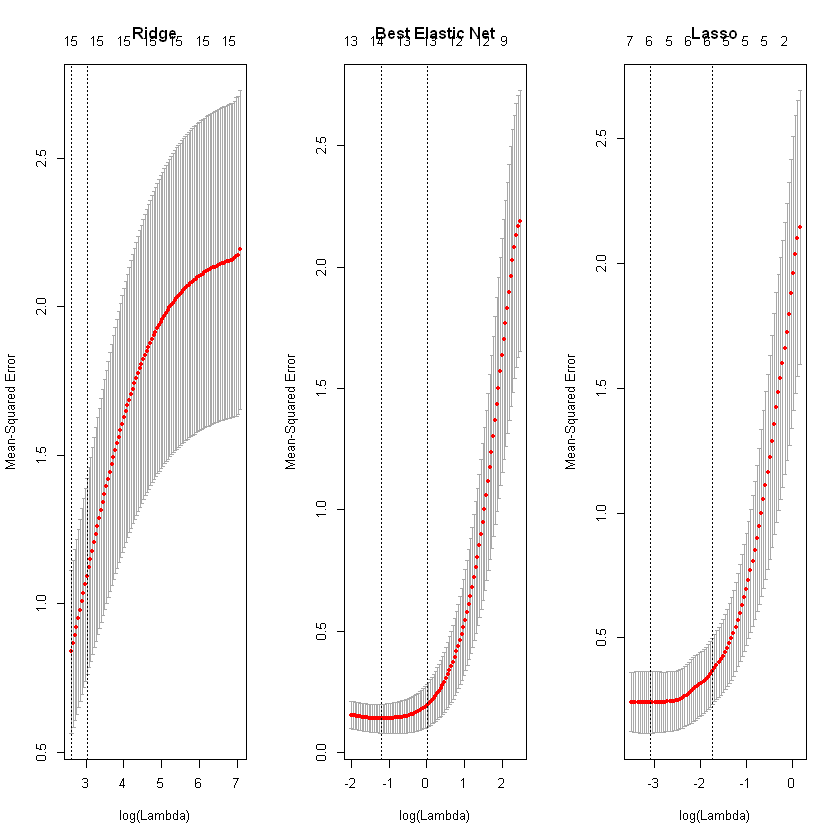

In [4]:
########################################################
#Question 1
########################################################

# Rigde
rigde <- cv.glmnet(x=x,y=y,alpha=0,type.measure="mse",family="gaussian")
ridge_best <- rigde$lambda.min

# Best Elastic Net
alpha_set <- seq(0.1,0.9,0.1)
min_mse <- list()
for (a in alpha_set){
    cv.fit <- cv.glmnet(x=x,y=y,alpha=a,type.measure="mse",family="gaussian")
    min_mse <- append(min_mse,cv.fit$cvm[cv.fit$lambda == cv.fit$lambda.min])
}

best_alpha <- alpha_set[which.min(min_mse)]
best_elastic <- cv.glmnet(x=x,y=y,alpha=best_alpha,type.measure="mse",family="gaussian")
elastic_best <- best_elastic$lambda.min

# Lasso
lasso <- cv.glmnet(x=x,y=y,alpha=1,type.measure="mse",family="gaussian")
lasso_best <- lasso$lambda.min

# plot the MSE plot
par(mfrow=c(1,3))
plot(rigde)
title('Ridge')
plot(best_elastic)
title('Best Elastic Net')
plot(lasso)
title('Lasso')

## Provide and Explain the Coefficients Plots for Ridge, Best-alpha EN, Lasso -- all at their respective best lambdas

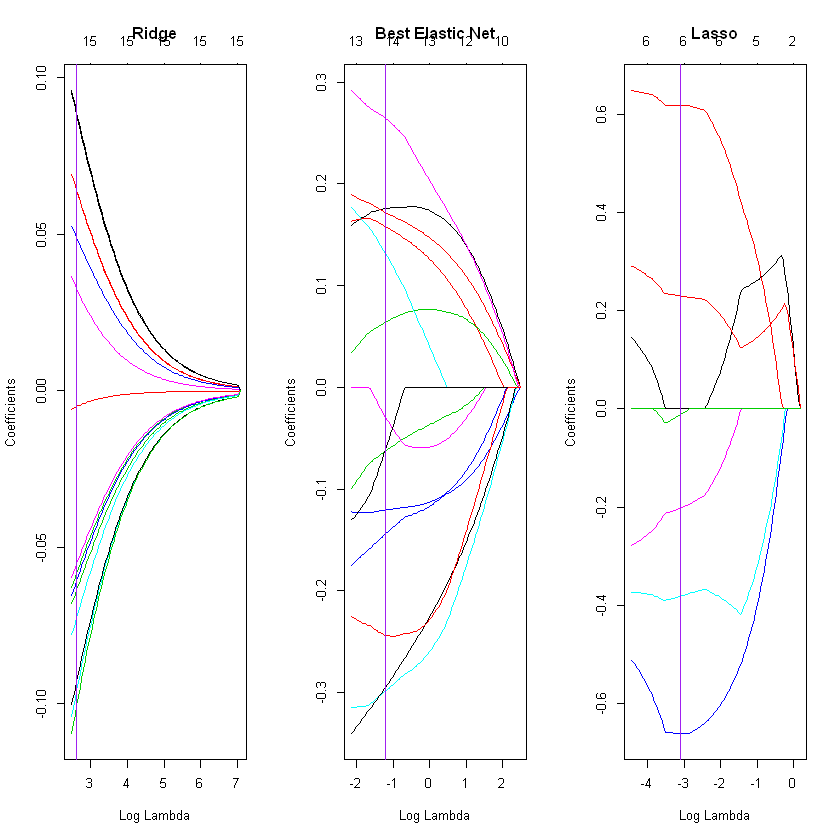

In [5]:
###################################################################
#Question 2
###################################################################

# Rigde
rigde_2 <- glmnet(x=x,y=y,alpha=0,family="gaussian")
# rigde$lambda.min

# Best Elastic Net
best_elastic_2 <- glmnet(x=x,y=y,alpha=best_alpha,family="gaussian")

# Lasso
lasso_2 <- glmnet(x=x,y=y,alpha=1,family="gaussian")

# Coefficient Plots
par(mfrow=c(1,3))
plot(rigde_2,xvar="lambda", label=TRUE)
title('Ridge')
abline(v=log(ridge_best), col="purple")

plot(best_elastic_2,xvar="lambda", label=TRUE)
title('Best Elastic Net')
abline(v=log(elastic_best), col="purple")

plot(lasso_2,xvar="lambda", label=TRUE)
title('Lasso')
abline(v=log(lasso_best), col="purple")


## In one table with proper row/col names, present the final parameter estimates from Ridge, Best-alpha EN, Lasso -- all at their respective best lambdas.

In [6]:
##########################################################
#Question 3
##########################################################

# extract coefficients of the models with the best lambdas
row_n <- rownames(coef(lasso,s='lambda.min'))
lasso_coef <- round(coef(lasso,s='lambda.min')[,1],4)
ridge_coef <- round(coef(rigde,s='lambda.min')[,1],4)
elastic_coef <- round(coef(best_elastic,s='lambda.min')[,1],4)

# making atable to display
df <- cbind(ridge_coef,elastic_coef,lasso_coef)
rownames(df) <- row_n
sparse.model.matrix(~.-1,data.frame(df))

16 x 3 sparse Matrix of class "dgCMatrix"
              ridge_coef elastic_coef lasso_coef
(Intercept)       5.7895       5.4929     5.9895
Attractive        0.0888       0.1757     .     
Quiet             0.0639       0.1719     0.2297
Unreliable       -0.0582      -0.0628     .     
Poorly.Built     -0.0606      -0.1209     .     
Interesting      -0.0958      -0.2986    -0.6607
Sporty           -0.0553      -0.0292     .     
Uncomfortable    -0.0927      -0.2948    -0.3819
Roomy             0.0639       0.1583     .     
Easy.Service     -0.0636       .          .     
Prestige          0.0489       0.0638     .     
Common           -0.0724      -0.1442    -0.2023
Economical        0.0327       0.1314     .     
Successful        0.0880       0.2647     0.6176
AvantGarde       -0.0051      -0.0608     .     
Poor.Value       -0.1004      -0.2436    -0.0122

## Then compare % bias in the estimated parameters with the corresponding OLS estimates ((via lm using the same variables).

In [7]:
##########################################################
#Question 4
##########################################################

#calculate R^2 of glmnet models
ridge_hat <- predict(rigde,x,type='response',s='lambda.min')
rss <- sum((ridge_hat - y) ^ 2)
tss <- sum((y - mean(y)) ^ 2)
ridge_r <- 1 - rss/tss

elastic_hat <- predict(best_elastic,x,type='response',s='lambda.min')
rss <- sum((elastic_hat - y) ^ 2)
tss <- sum((y - mean(y)) ^ 2)
elastic_r <- 1 - rss/tss

lasso_hat <- predict(lasso,x,type='response',s='lambda.min')
rss <- sum((lasso_hat - y) ^ 2)
tss <- sum((y - mean(y)) ^ 2)
lasso_r <- 1 - rss/tss

r_df <- rbind(ridge_r,elastic_r,lasso_r)

In [122]:
# calculate R^2 of OLS models with the same variables as glmnet models
variables_ridge <- which(!ridge_coef==0)-1
variables_ridge <- variables_ridge[-1]
ridge_x <- x[,variables_ridge]
ridge_lm_r <- summary(lm(y~ridge_x))$r.squared

variables_elastic <- which(!elastic_coef==0)-1
variables_elastic <- variables_elastic[-1]
elastic_x <- x[,variables_elastic]
elastic_lm_r <- summary(lm(y~elastic_x))$r.squared

variables_lasso <- which(!lasso_coef==0)-1
variables_lasso <- variables_lasso[-1]
lasso_x <- x[,variables_lasso]
lasso_lm_r <- summary(lm(y~lasso_x))$r.squared

r_lm <- rbind(ridge_lm_r,elastic_lm_r,lasso_lm_r)

r_com <- cbind(r_df,r_lm)
rownames(r_com) <- c('Ridge_V','Elastic_V','Lasso_V')
colnames(r_com) <- c('glmnet_R2','lm_R2')

r_com

,glmnet_R2,lm_R2
Ridge_V,0.6564926,1.0000000
Elastic_V,0.9908331,1.0000000
Lasso_V,0.9946656,0.9965432
